## Final Project Submission

Please fill out:
* Student name: Christos, Marcos and Rachel
* Student pace: Full Time
* Scheduled project review date/time: 02/19/2021 - 5p.m. CT
* Instructor name: Max Barry
* Blog post URL: www.google.com


# **Goal**: To create a model to get the highest accuracy possible using Multiple Regression

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from sklearn import ensemble
import yaml
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# Reading and naming our dataframe
df = pd.read_csv("data/kc_house_data.csv")

## Here we start our exploratory data analysis

In [3]:
# Checking the shape of it to understand how many columns and rows we have
df.shape

(21597, 21)

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

First thing we notice is that the Zip Code is still a number, what would affect badly our model

In [161]:
df['zipcode'] = df['zipcode'].astype(str)

In [226]:
#df['lat'] = df['lat'].astype(str)

In [227]:
#df['long'] = df['long'].astype(str)

In [162]:
# Getting statiscal values for our dataset, easy to look for outliers
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_sold,has_basement
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.0,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233191,3.409752,7.657946,1788.631506,285.702954,1971.000787,68.761391,47.560087,-122.213977,1986.650722,12758.656649,1.0,0.385071
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.764689,0.650471,1.173218,827.763251,439.825454,29.375460,364.045627,0.138552,0.140725,685.231768,27275.018316,0.0,0.486623
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.0,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,1.0,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,1.0,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,1.0,1.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,1.0,1.000000


In [6]:
# We check for this bedrooms outlier and realize that is a mistake by checking on the website and comparing to the total sqft.

In [7]:
# Removing the house with 33 bedrooms that was clearly a mistake
df = df.sort_values(['bedrooms'], ascending=False)[1:]

In [8]:
# We checked for the sqft_living outlier,  The house id is 1225069038 and it is 
# on 26408 NE 70TH ST 98053, it's a equine rehab center

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

So, after the first analysis, we realize that:

1 - We don't have any duplicates

2 - We have some NaN values

3 - We have some outliers based on price, number of bedrooms, square footage - they could be either correlated (justified) or a mistake.

4 - We have some potential values that could be aggregated (like ZipCode), or deleted because have similar meaning.

5 - After that we would have more unique values, poiting towards being optimal to transform into a categorical value

### Here we start manipulation of the data

Let's create a column with the year that it was sold, instead of the full date that is hard to work with.

In [11]:
# First we create a for loop to create a list with only the years of each sale
year_list = []
for x in df['date']:
    year_list.append(x[-4:])

df['year_sold'] = year_list

In [12]:
# We choose to check if our value is string, and if so, we change it to float because of the function we want to run
type(df['year_sold'][0])

str

In [13]:
df['year_sold'] = df['year_sold'].astype(float)

In [14]:
df['year_sold'] = np.where(df['year_sold']== '2014', 0, 1)

In [15]:
# Now we drop date and id columns, because we don't want any noise
# in our model with variables that actually don't mean much
# Also for some of the code, it tries to transform everything into float, and it can't handle the date format
df = df.drop(columns=['id', 'date'])

In [16]:
# Now we want to clean our data, replacing NaN Values and unknown values (such as "?")
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [17]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [18]:
# The 'condition' columns also had a few "?" values, that we may as well replace with 0's
df['condition'] = np.where(df['condition']=='?', 0, df['condition'])

In [19]:
df['condition'] = df['condition'].astype(float)

In [169]:
df['devland'] = df['sqft_living']/df['sqft_lot']

> The choice to replace with 0's in these two cases is that we read the 0 as lack of something. In the first case, lack of a basement in the house, in the second, lack of the evaluation.

# Which strategy to adopt with the NaN Values?

In [20]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year_sold           0
dtype: int64

In [21]:
df['waterfront'].value_counts()



0.0    19074
1.0      146
Name: waterfront, dtype: int64

Maybe replace nan values with 0, since it's very unlikely that such an important thing would not be mentioned

In [22]:
df['yr_renovated'].value_counts()


0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1976.0        1
1944.0        1
1948.0        1
1950.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [23]:
df['view'].value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

0 in these 2 last columns('yr_renovated' and 'view') is adopted as "We don't know this value"(basically a NaN) or we don't have this (a view or a renovation). So 0 would be also a good replacement for it.

So based on our dataframe all the values are fitable of replacing the NaN value for a 0

In [24]:
df = df.fillna(0)

In [25]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
dtype: int64

No NaN values, good to go.

### Let's take a look at the possible places that we could make a categorical variable, maybe use OneHotEncoder on it

In [26]:
df.nunique()

price            3622
bedrooms           11
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     303
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
year_sold           1
dtype: int64

In [27]:
list_unique = list(df.nunique())
list_unique.sort()

In [28]:
print(list_unique)


[1, 2, 5, 5, 6, 11, 11, 29, 70, 70, 116, 303, 751, 777, 942, 1034, 3622, 5033, 8682, 9776]


So we see that the first 5 values are under 10 unique values, which means it's a good candidate to be a categorical variable

And they are 'year_sold', 'waterfront', 'view', 'condition' and 'floors'.

The year_sold is because we made this one, since we were having problems with date format before.

In [29]:
df['waterfront'].value_counts()

0.0    21450
1.0      146
Name: waterfront, dtype: int64

In [30]:
df['year_sold'].value_counts()

1    21596
Name: year_sold, dtype: int64

In [31]:
# df['waterfront'] and df['year_sold'] are pretty much done

In [32]:
df['view'].value_counts()

0.0    19484
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [33]:
df['condition'].value_counts()

3.0    14020
4.0     5677
5.0     1700
2.0      170
1.0       29
Name: condition, dtype: int64

In [34]:
# df['view'] and df['condition'] are well fitted with their values, so we can say it's categorical already

In [35]:
df['floors'].value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [36]:
# df['floors'] has some different values that are float but that's ok, we are going to let the model deal with it.

### Let's create a new column to simply tell us if the house has a basement or not

In [37]:
# Replacing any abnormal values with 0's
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [38]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [39]:
df['has_basement'] = np.where(df['sqft_basement']>0, 1, 0)

In [40]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,has_basement
8748,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3.0,7,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,1,1
13301,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3.0,9,...,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,1,1
19239,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4.0,7,...,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,1,1


## Now we are going to check for variables with correlation over 0.7 and try to understand them better


In [41]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,has_basement
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,0.667964,...,0.321103,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849,NaN,0.178255
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,...,0.303517,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,NaN,0.160391
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,-0.126443,0.665834,...,0.278504,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,NaN,0.159897
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,0.762776,...,0.428683,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,NaN,0.201236
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,0.114726,...,0.015038,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,NaN,-0.034877
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,0.458783,...,-0.241845,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,NaN,-0.252426
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,0.082817,...,0.083053,-0.024491,0.073938,0.028925,-0.012154,-0.037632,0.083822,0.030657,NaN,0.039227
view,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,0.249077,...,0.270641,-0.054464,0.090337,0.085066,0.006334,-0.077715,0.278921,0.073079,NaN,0.176930
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,-0.146854,...,0.168431,-0.361555,-0.055795,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,NaN,0.130422
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,0.249077,-0.146854,1.000000,...,0.165863,0.447854,0.015618,-0.185761,0.113602,0.200324,0.713863,0.120974,NaN,0.050736


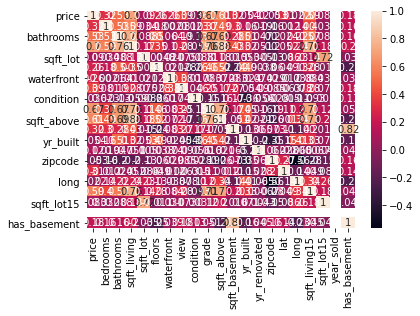

In [42]:
sns.heatmap(df.corr(), annot=True);


In [43]:
# These 2 functions have an objective to give us the highest n correlation in our data frame.
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(df, 15))

sqft_living    sqft_above       0.876448
sqft_basement  has_basement     0.820892
sqft_living    grade            0.762776
               sqft_living15    0.756400
grade          sqft_above       0.756069
bathrooms      sqft_living      0.755755
sqft_above     sqft_living15    0.731756
sqft_lot       sqft_lot15       0.718203
grade          sqft_living15    0.713863
price          sqft_living      0.701929
bathrooms      sqft_above       0.686664
price          grade            0.667964
bathrooms      grade            0.665834
price          sqft_above       0.605392
bedrooms       sqft_living      0.593178
dtype: float64


### df['sqft_lot'] < df['sqft_lot15']

In [44]:
print(df.corr()['sqft_lot'].sum(), df.corr()['sqft_lot15'].sum())

2.683208659222348 2.7664118640659954


In [45]:
# Sqft_lot has a lower correlation with other variables and a higher one with price - a no brainer

### df['sqft_living'] > df['sqft_living15']

In [46]:
print(df.corr()['sqft_living'].sum(), df.corr()['sqft_living15'].sum())

7.577862430926859 6.315817902806983


In [47]:
# But sqft_living is moree highly correlated with Price by quite a lot, and also we are not sure about what sqft_lot15 means, 
# so from a business understanding standpoint, is better to go with sqft_lot

In [48]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df).fit()
pricekc_mod_summtest = pricekc_modtest.summary()

### Here we did some modeling changing variables and choosing different datasets without different outliers (Without the highest price, Without the top 3 highest price, without the lowest price and etc)

In [49]:
columnsdf = list(df.columns)

In [108]:
pd.plotting.scatter_matrix(df[columnsdf], figsize=(10,12));

C:\Users\celes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\celes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\celes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


Error in callback <function flush_figures at 0x000001AB90A8BF70> (for post_execute):


KeyboardInterrupt: 

In [51]:
price_kc3 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod3 = ols(formula=price_kc3, data=df).fit()
pricekc_mod_summ3 = pricekc_mod3.summary()


In [52]:
pricekc_mod_summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     3050.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:05:50   Log-Likelihood:            -2.9559e+05
No. Observations:               21596   AIC:                         5.912e+05
Df Residuals:                   21581   BIC:                         5.913e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.652e+06   3.06e+06      2.502      0.012    1.66e+06    1.36e+07
bedrooms     -5.416e+04   2068.511    -26.183      0.000   -5.82e+04   -5.01e+04
bathrooms     5.253e+04   3472.089     15.130      0.000    4.57e+04    5.93e+04
sqft_living    271.9640      2.751     98.872      0.000     266.573     277.356
sqft_lot        -0.0595      0.037     -1.619      0.105      -0.132       0.013
floors        3.074e+04   3618.796      8.494      0.000    2.36e+04    3.78e+04
waterfront    5.871e+05   1.92e+04     30.623      0.000     5.5e+05    6.25e+05
view          6.578e+04   2187.061     30.078      0.000    6.15e+04    7.01e+04
condition     2.475e+04   2472.555     10.009      0.000    1.99e+04    2.96e+04
yr_built     -1865.8857     74.156    -25.162      0.000   -2011.236   -1720.535
yr_renovated    25.3028      4.203      6.020      0.000      17.065      33.541
has_basement -3.605e+04   3524.570    -10.229      0.000    -4.3e+04   -2.91e+04
zipcode       -718.5972     34.709    -20.703      0.000    -786.630    -650.564
lat           6.976e+05   1.12e+04     62.492      0.000    6.76e+05     7.2e+05
long         -2.719e+05   1.36e+04    -19.970      0.000   -2.99e+05   -2.45e+05
==============================================================================
Omnibus:                    15197.074   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           828997.627
Skew:                           2.797   Prob(JB):                         0.00
Kurtosis:                      32.833   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

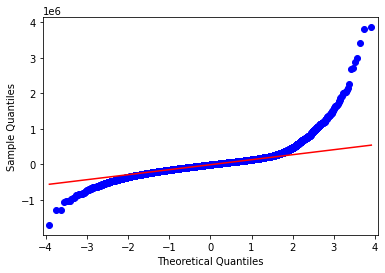

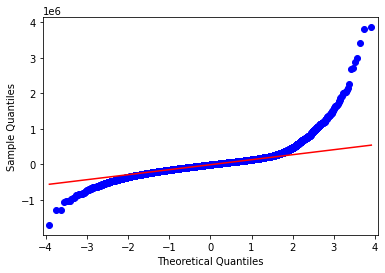

In [123]:
qqplot(pricekc_mod3.resid, line = 'q')

In [53]:
pricekc_mod_summtest

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:05:25   Log-Likelihood:            -2.9971e+05
No. Observations:               21596   AIC:                         5.994e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.175e+04   6770.262     13.552      0.000    7.85e+04    1.05e+05
bedrooms    -6.295e+04   2408.603    -26.135      0.000   -6.77e+04   -5.82e+04
sqft_living   317.6392      2.372    133.920      0.000     312.990     322.288
==============================================================================
Omnibus:                    14275.856   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           478224.617
Skew:                           2.700   Prob(JB):                         0.00
Kurtosis:                      25.412   Cond. No.                     9.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
price_kc4 = "price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+yr_built+has_basement+zipcode+lat+long"
pricekc_mod4 = ols(formula=price_kc4, data=df).fit()
pricekc_mod_summ4 = pricekc_mod4.summary()

In [55]:
pricekc_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3549.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:05:50   Log-Likelihood:            -2.9561e+05
No. Observations:               21596   AIC:                         5.912e+05
Df Residuals:                   21583   BIC:                         5.914e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.067e+06   3.04e+06      2.650      0.008     2.1e+06     1.4e+07
bedrooms     -5.429e+04   2061.791    -26.332      0.000   -5.83e+04   -5.03e+04
bathrooms     5.523e+04   3447.375     16.020      0.000    4.85e+04     6.2e+04
sqft_living    271.2198      2.722     99.638      0.000     265.884     276.555
floors          3.2e+04   3613.766      8.855      0.000    2.49e+04    3.91e+04
waterfront    5.923e+05   1.92e+04     30.898      0.000    5.55e+05     6.3e+05
view          6.597e+04   2186.512     30.170      0.000    6.17e+04    7.03e+04
condition     2.253e+04   2445.686      9.211      0.000    1.77e+04    2.73e+04
yr_built     -1988.7369     70.973    -28.021      0.000   -2127.850   -1849.624
has_basement -3.599e+04   3525.343    -10.209      0.000   -4.29e+04   -2.91e+04
zipcode       -722.6589     34.731    -20.807      0.000    -790.735    -654.583
lat           6.968e+05   1.11e+04     62.573      0.000    6.75e+05    7.19e+05
long         -2.741e+05   1.34e+04    -20.429      0.000      -3e+05   -2.48e+05
==============================================================================
Omnibus:                    15231.376   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           836635.603
Skew:                           2.804   Prob(JB):                         0.00
Kurtosis:                      32.972   Cond. No.                     2.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

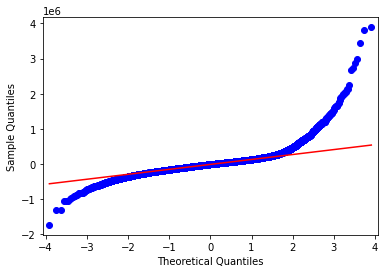

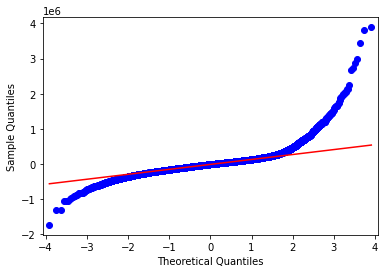

In [124]:
qqplot(pricekc_mod4.resid, line = 'q')

In [56]:
price_kc5 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod5 = ols(formula=price_kc5, data=df).fit()
pricekc_mod_summ5 = pricekc_mod5.summary()

In [57]:
pricekc_mod_summ5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     3050.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:05:51   Log-Likelihood:            -2.9559e+05
No. Observations:               21596   AIC:                         5.912e+05
Df Residuals:                   21581   BIC:                         5.913e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.652e+06   3.06e+06      2.502      0.012    1.66e+06    1.36e+07
bedrooms     -5.416e+04   2068.511    -26.183      0.000   -5.82e+04   -5.01e+04
bathrooms     5.253e+04   3472.089     15.130      0.000    4.57e+04    5.93e+04
sqft_living    271.9640      2.751     98.872      0.000     266.573     277.356
sqft_lot        -0.0595      0.037     -1.619      0.105      -0.132       0.013
floors        3.074e+04   3618.796      8.494      0.000    2.36e+04    3.78e+04
waterfront    5.871e+05   1.92e+04     30.623      0.000     5.5e+05    6.25e+05
view          6.578e+04   2187.061     30.078      0.000    6.15e+04    7.01e+04
condition     2.475e+04   2472.555     10.009      0.000    1.99e+04    2.96e+04
yr_built     -1865.8857     74.156    -25.162      0.000   -2011.236   -1720.535
yr_renovated    25.3028      4.203      6.020      0.000      17.065      33.541
has_basement -3.605e+04   3524.570    -10.229      0.000    -4.3e+04   -2.91e+04
zipcode       -718.5972     34.709    -20.703      0.000    -786.630    -650.564
lat           6.976e+05   1.12e+04     62.492      0.000    6.76e+05     7.2e+05
long         -2.719e+05   1.36e+04    -19.970      0.000   -2.99e+05   -2.45e+05
==============================================================================
Omnibus:                    15197.074   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           828997.627
Skew:                           2.797   Prob(JB):                         0.00
Kurtosis:                      32.833   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

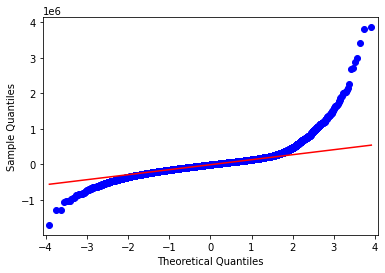

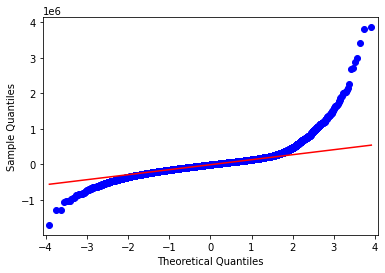

In [125]:
qqplot(pricekc_mod5.resid, line = 'q')

### Modifying the data even more before using it on the model

In [228]:
dftest = df.sort_values(['price'], ascending=True)

In [229]:
dftest['price_log'] = np.log(df['price'])
dftest['sqft_lot_log'] = np.log(df['sqft_lot'])
dftest['sqft_above_log'] = np.log(df['sqft_above'])
dftest['sqft_living15_log'] = np.log(df['sqft_living15'])
dftest['sqft_living_log'] = np.log(df['sqft_living'])
dftest['sqft_lot15_log'] = np.log(df['sqft_lot15'])
dftest['devland_log'] = np.log(df['devland'])

In [230]:
dftest.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,year_sold,has_basement,devland,price_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_living_log,sqft_lot15_log,devland_log
15279,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1.0,5,...,1,0,0.047724,11.264464,9.701616,6.659294,7.438384,6.659294,9.248310,-3.042322
465,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2.0,4,...,1,0,0.085149,11.289782,8.527144,6.063785,7.090077,6.063785,8.922658,-2.463358
16184,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1.0,5,...,1,0,0.073183,11.302204,9.207837,6.593045,6.756932,6.593045,9.104980,-2.614793


In [217]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'has_basement', 'devland'],
      dtype='object')

In [235]:
# How to group and include lat+long ?
test = "price_log~bedrooms+bathrooms+sqft_living_log+sqft_lot_log+floors+waterfront+view+condition+grade+sqft_above_log+yr_built+yr_renovated+has_basement+zipcode"
test_mod = ols(formula=test, data=dftest).fit()
test_mod_summ = test_mod.summary()

In [236]:
test_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1932.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:03:34   Log-Likelihood:                 6140.5
No. Observations:               21596   AIC:                        -1.211e+04
Df Residuals:                   21513   BIC:                        -1.145e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.0591      0.159     50.630      0.000       7.747       8.371
zipcode[T.98002]    -0.0135      0.016     -0.836      0.403      -0.045       0.018
zipcode[T.98003]     0.0149      0.015      1.025      0.305      -0.014       0.043
zipcode[T.98004]     1.1477      0.014     80.545      0.000       1.120       1.176
zipcode[T.98005]     0.7422      0.017     43.173      0.000       0.709       0.776
zipcode[T.98006]     0.6660      0.013     51.881      0.000       0.641       0.691
zipcode[T.98007]     0.6612      0.018     36.329      0.000       0.626       0.697
zipcode[T.98008]     0.6587      0.015     45.134      0.000       0.630       0.687
zipcode[T.98010]     0.2374      0.021     11.464      0.000       0.197       0.278
zipcode[T.98011]     0.4637      0.016     28.543      0.000       0.432       0.495
zipcode[T.98014]     0.2920      0.019     15.228      0.000       0.254       0.330
zipcode[T.98019]     0.3272      0.016     19.945      0.000       0.295       0.359
zipcode[T.98022]     0.0331      0.015      2.141      0.032       0.003       0.063
zipcode[T.98023]    -0.0215      0.013     -1.698      0.090      -0.046       0.003
zipcode[T.98024]     0.4170      0.023     18.345      0.000       0.372       0.462
zipcode[T.98027]     0.5272      0.013     39.839      0.000       0.501       0.553
zipcode[T.98028]     0.4285      0.015     29.529      0.000       0.400       0.457
zipcode[T.98029]     0.6215      0.014     43.911      0.000       0.594       0.649
zipcode[T.98030]     0.0578      0.015      3.873      0.000       0.029       0.087
zipcode[T.98031]     0.0806      0.015      5.504      0.000       0.052       0.109
zipcode[T.98032]    -0.0202      0.019     -1.065      0.287      -0.057       0.017
zipcode[T.98033]     0.8003      0.013     61.148      0.000       0.775       0.826
zipcode[T.98034]     0.5511      0.012     44.346      0.000       0.527       0.575
zipcode[T.98038]     0.1831      0.012     14.966      0.000       0.159       0.207
zipcode[T.98039]     1.3235      0.028     47.644      0.000       1.269       1.378
zipcode[T.98040]     0.9037      0.015     61.135      0.000       0.875       0.933
zipcode[T.98042]     0.0696      0.012      5.617      0.000       0.045       0.094
zipcode[T.98045]     0.3075      0.016     19.622      0.000       0.277       0.338
zipcode[T.98052]     0.6519      0.012     52.860      0.000       0.628       0.676
zipcode[T.98053]     0.5962      0.013     44.657      0.000       0.570       0.622
zipcode[T.98055]     0.1585      0.015     10.740      0.000       0.130       0.187
zipcode[T.98056]     0.3360      0.013     25.378      0.000       0.310       0.362
zipcode[T.98058]     0.1690      0.013     13.124      0.000       0.144       0.194
zipcode[T.98059]     0.

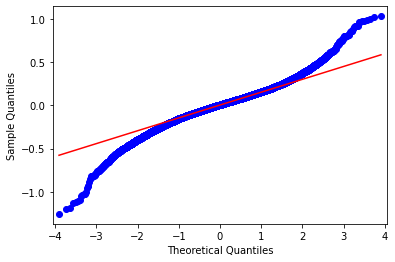

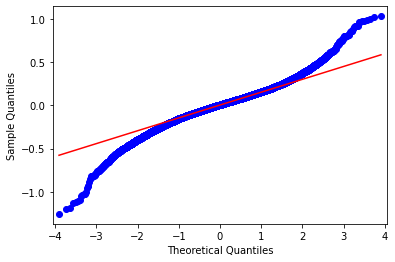

In [237]:
qqplot(test_mod.resid, line = 'q')

In [265]:
test1 = "price_log~bedrooms+bathrooms+sqft_living_log+sqft_lot_log+floors+waterfront+view+condition+grade+sqft_above_log+yr_built+yr_renovated+has_basement"
test_mod1 = ols(formula=test1, data=dftest).fit()
test_mod_summ1 = test_mod1.summary()

In [266]:
test_mod_summ1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3133.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:35:27   Log-Likelihood:                -5343.7
No. Observations:               21596   AIC:                         1.072e+04
Df Residuals:                   21582   BIC:                         1.083e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.0973      0.206     92.568      0.000      18.693      19.502
bedrooms           -0.0381      0.003    -12.023      0.000      -0.044      -0.032
bathrooms           0.0692      0.005     13.874      0.000       0.059       0.079
sqft_living_log     0.3096      0.021     14.838      0.000       0.269       0.350
sqft_lot_log       -0.0379      0.003    -12.967      0.000      -0.044      -0.032
floors              0.0605      0.006     10.057      0.000       0.049       0.072
waterfront          0.3731      0.028     13.363      0.000       0.318       0.428
view                0.0550      0.003     17.353      0.000       0.049       0.061
condition           0.0396      0.004     11.055      0.000       0.033       0.047
grade               0.2276      0.003     74.827      0.000       0.222       0.234
sqft_above_log      0.1134      0.021      5.485      0.000       0.073       0.154
yr_built           -0.0055      0.000    -55.301      0.000      -0.006      -0.005
yr_renovated     1.079e-05   6.11e-06      1.765      0.078    -1.2e-06    2.28e-05
has_basement        0.0840      0.009      9.658      0.000       0.067       0.101
==============================================================================
Omnibus:                       69.903   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.840
Skew:                          -0.040   Prob(JB):                     3.10e-20
Kurtosis:                       3.306   Cond. No.                     1.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

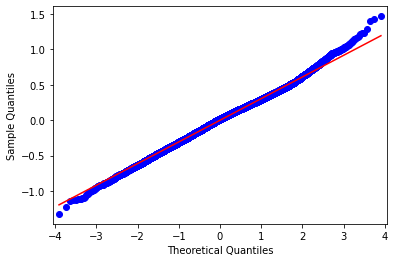

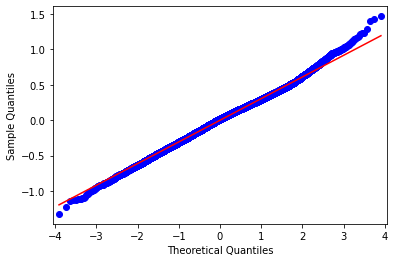

In [267]:
qqplot(test_mod1.resid, line = 'q')

### Not using the columns with high multicolinearity between other variables, and possible high between the value and the target

In [260]:
dftest.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
waterfront           float64
view                 float64
condition            float64
grade                  int64
sqft_above             int64
sqft_basement        float64
yr_built               int64
yr_renovated         float64
zipcode                int32
lat                  float64
long                 float64
sqft_living15          int64
sqft_lot15             int64
year_sold              int32
has_basement           int32
devland              float64
price_log            float64
sqft_lot_log         float64
sqft_above_log       float64
sqft_living15_log    float64
sqft_living_log      float64
sqft_lot15_log       float64
devland_log          float64
dtype: object

In [245]:
dftest['zipcode'] = df['zipcode'].astype(int)
dftest['lat'] = df['lat'].astype(float)
dftest['long'] = df['long'].astype(float)
dftest['condition'] = df['condition'].astype(float)

In [258]:
listaaa = 'bedrooms+bathrooms+sqft_living_log+sqft_lot_log+floors+waterfront+view+condition+grade+sqft_above_log+yr_built+yr_renovated+has_basement+zipcode'
colunasdoteutoba = listaaa.split('+')
colunasdoteutoba

['bedrooms',
 'bathrooms',
 'sqft_living_log',
 'sqft_lot_log',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above_log',
 'yr_built',
 'yr_renovated',
 'has_basement',
 'zipcode']

In [252]:
def get_redundant_pairs(dftest):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = dftest.columns
    for i in range(0, dftest.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(dftest, n=5):
    au_corr = dftest.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(dftest)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(dftest, 33))

sqft_living15      sqft_living15_log    0.976818
sqft_above         sqft_above_log       0.962545
sqft_living        sqft_living_log      0.954607
sqft_lot_log       sqft_lot15_log       0.918666
price              price_log            0.891746
sqft_lot_log       devland_log          0.885386
sqft_living        sqft_above           0.876448
sqft_above_log     sqft_living_log      0.864986
sqft_living        sqft_above_log       0.843135
sqft_above         sqft_living_log      0.832383
devland            devland_log          0.822547
sqft_basement      has_basement         0.820892
sqft_lot15_log     devland_log          0.811611
sqft_living        grade                0.762776
bathrooms          sqft_living_log      0.762133
sqft_living        sqft_living15        0.756400
grade              sqft_above           0.756069
bathrooms          sqft_living          0.755755
sqft_living15_log  sqft_living_log      0.746839
grade              sqft_living_log      0.743036
                   s

In [259]:
dftest.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,year_sold,has_basement,devland,price_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_living_log,sqft_lot15_log,devland_log
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,0.667964,...,NaN,0.178255,0.123066,0.891746,0.161566,0.542703,0.543857,0.611846,0.147923,0.131909
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,...,NaN,0.160391,0.027760,0.350871,0.189953,0.530353,0.418235,0.637670,0.167168,0.114923
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,-0.126443,0.665834,...,NaN,0.159897,0.287012,0.551270,0.100617,0.695838,0.571791,0.762133,0.091963,0.269539
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,0.762776,...,NaN,0.201236,0.076984,0.695209,0.344665,0.843135,0.732179,0.954607,0.321010,0.108987
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,0.114726,...,NaN,-0.034877,-0.252603,0.100032,0.638607,0.163616,0.145155,0.150098,0.550134,-0.593970
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,0.458783,...,NaN,-0.252426,0.556703,0.310665,-0.237479,0.547599,0.275443,0.367556,-0.227256,0.429059
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,0.082817,...,NaN,0.039227,-0.029807,0.170724,0.072339,0.059123,0.076501,0.078898,0.081560,-0.036847
view,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,0.249077,...,NaN,0.176930,-0.002227,0.344665,0.121747,0.157009,0.262548,0.244800,0.119111,-0.006936
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,-0.146854,...,NaN,0.130422,-0.156500,0.038855,0.073741,-0.150635,-0.089150,-0.049584,0.079944,-0.101490
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,0.249077,-0.146854,1.000000,...,NaN,0.050736,0.191394,0.703747,0.184316,0.742866,0.689050,0.743036,0.184987,0.172627


In [ ]:
LOT: 
sqft_lot_log       sqft_lot15_log       0.918666
sqft_lot_log       devland_log          0.885386
sqft_lot15_log     devland_log          0.811611
devland            sqft_lot_log         0.737891
sqft_lot           sqft_lot15           0.718203

sqft_lot15         sqft_lot15_log       0.701522


LIVING:
sqft_living15      sqft_living15_log    0.976818
sqft_living        sqft_living_log      0.954607
sqft_living        sqft_above           0.876448
sqft_above_log     sqft_living_log      0.864986
sqft_living        sqft_above_log       0.843135
sqft_above         sqft_living_log      0.832383
sqft_living        grade                0.762776
bathrooms          sqft_living_log      0.762133
sqft_living        sqft_living15        0.756400
bathrooms          sqft_living          0.755755
sqft_living15_log  sqft_living_log      0.746839
grade              sqft_living_log      0.743036
sqft_above_log     sqft_living15_log    0.713088
sqft_above         sqft_living15_log    0.701732


price:
living15 > living15_log
living > living_log

lot_log > lot
lot15_log > lot15

sqft_above > sqft_above_log

grade = 0.667964
devland_log = 0.131909


In [58]:
# We checked for outliers by our distribuition, verified for the 75 percentile, 95 percentile and tried without them and
# realized that our R-Squared was actually dropping it, meaning that they are significant for our model.

In [59]:
# We checked for outliers by our distribuition in the other side, veryfing if cheaper houses
# would interfere a lot and tried FSM without them and realized that our 
# R-Squared was actually dropping it, meaning that they are significant for our model.

# Linear Regression

In [60]:
y = df['price']
predictors = df.drop('price', axis=1)
linreg = LinearRegression()
linreg.fit(predictors, y)
linreg.coef_

array([-3.93080647e+04,  4.33088518e+04,  1.03657494e+02,  1.26307070e-01,
        6.79019247e+03,  6.16294602e+05,  5.28813118e+04,  2.66209002e+04,
        9.66349618e+04,  7.79630718e+01,  5.51389091e+01, -2.65010492e+03,
        2.32328699e+01, -5.84800486e+02,  6.00100918e+05, -2.19070724e+05,
        2.16523905e+01, -3.93871939e-01,  0.00000000e+00, -7.54211067e+03])

In [61]:
linreg.intercept_

6579359.117001325

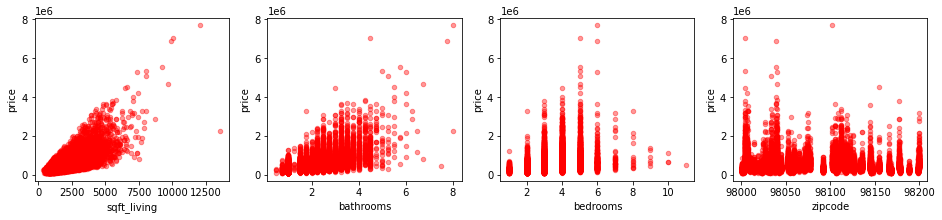

In [63]:
fig, axes = plt.pyplot.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'bathrooms', 'bedrooms', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

<ipython-input-65-836a0b19fd3b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:titl

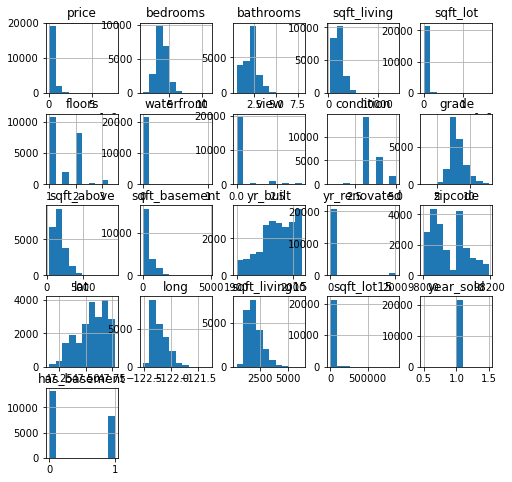

In [65]:
fig = plt.pyplot.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax)

In [66]:
df['yr_renovated'].nunique()
# 0.117855 corr w Price

70

In [67]:
df['sqft_lot'].nunique()
# 0.089876 corr w Price

9776

# Train Test Split

In [68]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,has_basement
8748,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3.0,7,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,1,1
13301,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3.0,9,...,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,1,1
19239,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4.0,7,...,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,1,1


In [69]:
y = df.price
X = df.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=22)

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
lr.score(X_train, y_train)

0.703847971779485

In [73]:
lr.coef_


array([-3.50284435e+04,  4.12760400e+04,  7.75004645e+01,  1.24437125e-01,
        6.96165602e+03,  6.00208368e+05,  5.14100074e+04,  2.72531604e+04,
        1.02529378e+05,  9.08160207e+01,  7.63497549e+01, -2.65155093e+03,
        2.11211023e+01, -5.56864710e+02,  5.87593040e+05, -2.13208815e+05,
        2.74029202e+01, -3.50099514e-01,  0.00000000e+00, -8.00506813e+03])

<AxesSubplot:>

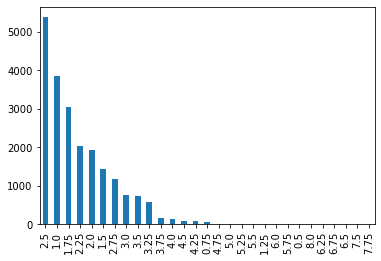

In [74]:
df['bathrooms'].value_counts().plot(kind='bar')

<AxesSubplot:>

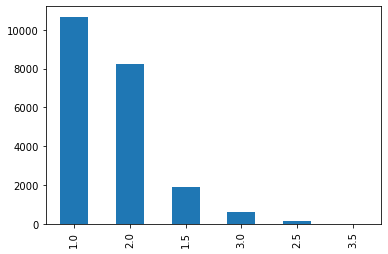

In [75]:
df['floors'].value_counts().plot(kind='bar')

In [134]:
most_expensive_df = df.sort_values(['price'], ascending=False)

In [135]:
most_expensive_df = most_expensive_df[0:30]

C:\Users\celes\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

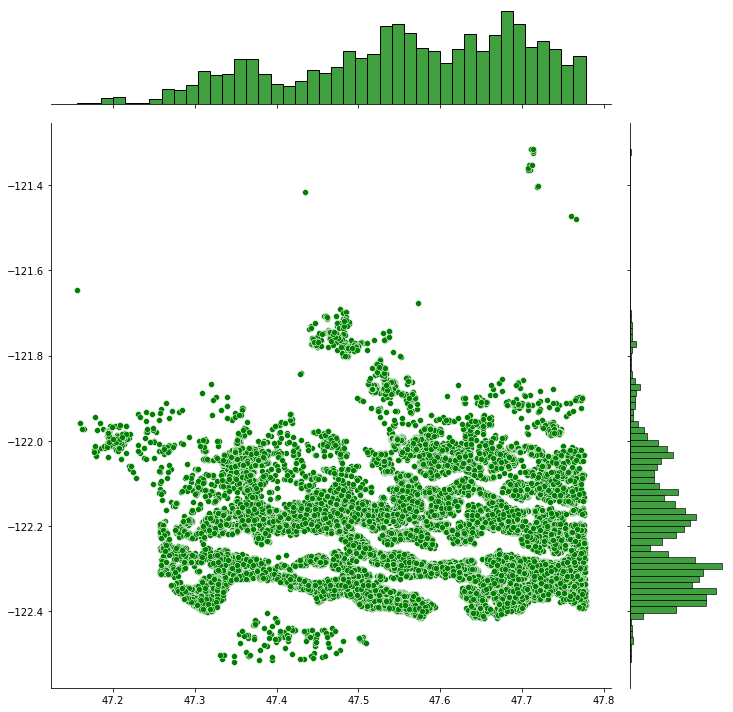

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [137]:
plt.pyplot.figure(figsize=(12, 12))
sns.jointplot(x=most_expensive_df.lat.values, y=most_expensive_df.long.values, size=10, color='g')
plt.pyplot.ylabel('Long', fontsize=12)
plt.pyplot.xlabel('Lat', fontsize=12)
plt.pyplot.show()
sns.despine

C:\Users\celes\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

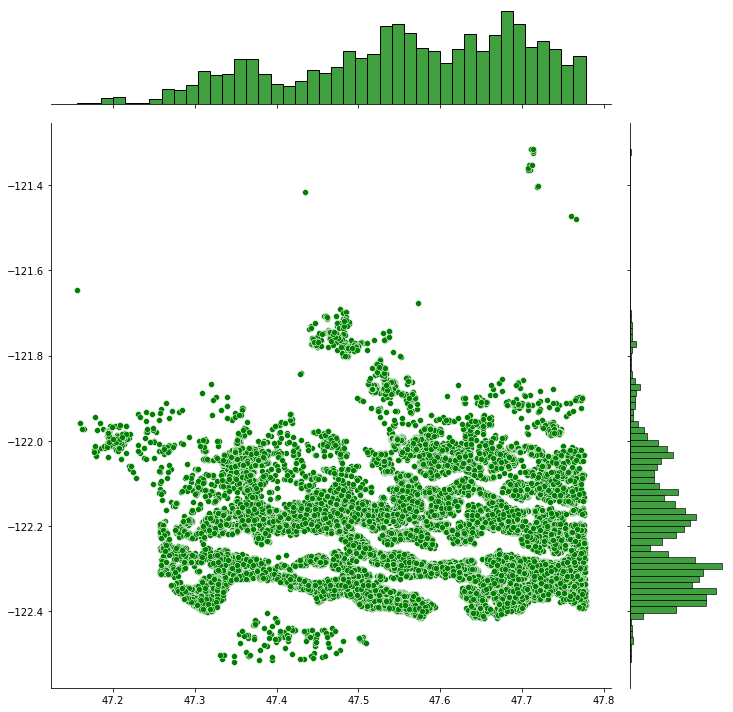

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [138]:
plt.pyplot.figure(figsize=(12, 12))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10, color='g')
plt.pyplot.ylabel('Long', fontsize=12)
plt.pyplot.xlabel('Lat', fontsize=12)
plt.pyplot.show()
sns.despine

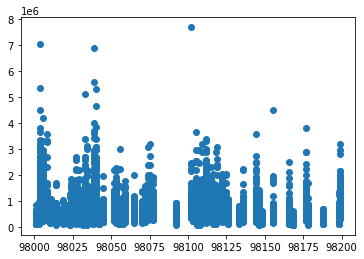

In [79]:
plt.pyplot.scatter(df.zipcode, df.price)

In [80]:
df_without_outliers = df.sort_values(['price'], ascending=False)[3:]

Text(0.5, 1.0, 'Prices per ZipCode (without the top 3)')

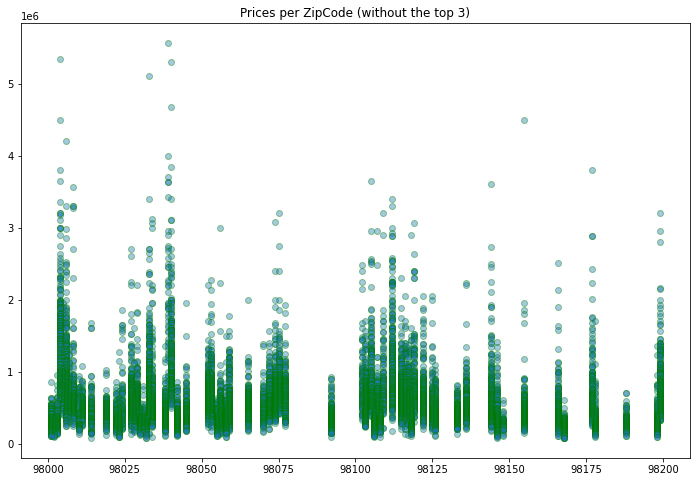

In [126]:
plt.pyplot.figure(figsize = (12,8))
plt.pyplot.scatter(df_without_outliers['zipcode'],df_without_outliers['price'], alpha=0.4, edgecolors='g')
plt.pyplot.title("Prices per ZipCode (without the top 3)")

In [84]:
y = df.price
X = df.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=30)

In [85]:
lr.fit(X_train, y_train)

LinearRegression()

In [86]:

lr.score(X_train, y_train)

0.7058883255945708

In [87]:
lr.score(X_test, y_test)

0.6889064729476198

In [88]:
lr.coef_

array([-3.88441258e+04,  4.62037930e+04,  9.36832124e+01,  1.52042994e-01,
        8.58727126e+03,  5.93484025e+05,  5.35848679e+04,  2.55032522e+04,
        9.74720563e+04,  7.75337253e+01,  6.19715440e+01, -2.67023716e+03,
        1.97808605e+01, -5.79108741e+02,  5.90165517e+05, -2.16593298e+05,
        2.62730955e+01, -4.38852193e-01,  0.00000000e+00, -1.06486613e+04])

### Here we try some Gradient Boosting Regressor

In [89]:
egbr = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 25,
                                         learning_rate = 0.1, loss = 'ls')

In [90]:
egbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=25, n_estimators=500)

In [91]:
egbr.score(X_test, y_test)

0.8773346284887322

### Here we try some KFold

In [92]:
X = df.drop('price', axis=1)
y = df.price

In [93]:
kf = KFold(n_splits=5)

train_r2 = []
test_r2 = []
for train_ind, test_ind in kf.split(X, y):
    
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_test, y_test = X.iloc[test_ind], y.iloc[test_ind]
    
    lr.fit(X_train, y_train)
    train_r2.append(lr.score(X_train, y_train))
    test_r2.append(lr.score(X_test, y_test))

In [94]:
np.mean(train_r2)

0.700479624002081

In [95]:
np.mean(test_r2)

0.6206077693895051

### Here some Polynomial Features

In [96]:
poly_2 = PolynomialFeatures(2)

df_poly = pd.DataFrame(
            poly_2.fit_transform(df.drop('price', axis=1))
                      )

X = df_poly
y = df.price

In [97]:
np.mean(train_r2)

0.700479624002081

In [98]:
np.mean(test_r2)

0.6206077693895051

In [ ]:
# Log different columns formula = "price ~ bedrooms_log+bathrooms+sqft_living+sqft_lot_log+waterfront+view+condition+grade+yr_built+devland_log"
# 0.682